In [2]:
import numpy as np 
import pandas as pd
import datetime as dt
from pylab import mpl, plt
from itertools import product
import pandas_datareader as web

plt.style.use('seaborn')
mpl.rcParams['font.family'] = 'serif'
%matplotlib inline

start = dt.datetime(2015,1,1)
end = dt.datetime(2019,1,31)
symbol = 'JPY=X'

df = web.DataReader(symbol, 'yahoo', start, end)
database = pd.DataFrame(index=df.index)
database[symbol] = df['Adj Close']
database.head()

,JPY=X
Date,
2015-01-01,119.672997
2015-01-02,119.870003
2015-01-05,120.433998
2015-01-06,119.425003
2015-01-07,118.672997


In [3]:
sma1 = range(20,61, 2)
sma2 = range(180,281, 5)

results = pd.DataFrame()

for sma1, sma2 in product(sma1, sma2):
    data = pd.DataFrame(data=database)
    data.dropna(inplace=True)
    data['Returns'] = np.log(data[symbol]/data[symbol].shift(1))
    data['sma1'] = data[symbol].rolling(sma1).mean()
    data['sma2'] = data[symbol].rolling(sma2).mean()
    data.dropna(inplace=True)
    data['Position'] = np.where(data['sma1']>data['sma2'], 1, -1)
    data['Strategy'] = data['Position'].shift(1)*data['Returns']
    data.dropna(inplace=True)
    perf = np.exp(data[['Returns', 'Strategy']].sum())
    results = results.append(pd.DataFrame(
            {'sma1':sma1, 'sma2':sma2,
             'market':perf['Returns'],
             'strategy':perf['Strategy'],
             'out': perf['Strategy'] - perf['Returns']},
             index=[0]), ignore_index=True)

results.sort_values('out', ascending=False).head(7)

,sma1,sma2,market,strategy,out
33,22,240,0.885523,0.951726,0.066204
9,20,225,0.884307,0.942608,0.058302
31,22,230,0.881721,0.934568,0.052847
11,20,235,0.888486,0.939879,0.051393
21,22,180,0.906361,0.955852,0.049490
84,28,180,0.906361,0.955439,0.049078
32,22,235,0.888486,0.935616,0.047130


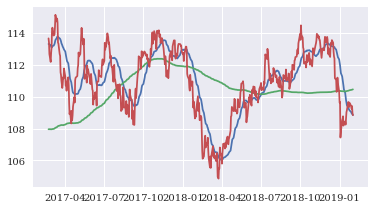

In [13]:
database['sma22'] = data[symbol].rolling(22).mean()
database['sma240'] = data[symbol].rolling(240).mean()
database.dropna(inplace=True)

ax1 = plt.subplot2grid((6,1), (0,0), rowspan=5, colspan=1)
ax1.plot(database.index, database['sma22'])
ax1.plot(database.index, database['sma240'])
ax1.plot(database.index, database['JPY=X'])

plt.show()